## Homework - 2 : Regression

# Question 1

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [49]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


array([[<Axes: title={'center': 'fuel_efficiency_mpg'}>]], dtype=object)

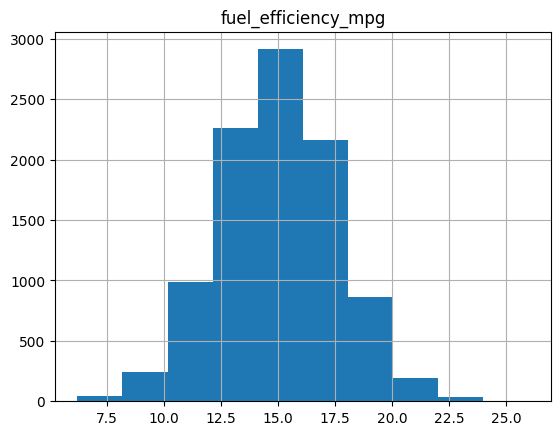

In [50]:
df.hist('fuel_efficiency_mpg')

In [51]:
print(df['fuel_efficiency_mpg'].kurt())
print(df['fuel_efficiency_mpg'].skew())

0.022732244497634557
-0.012062219273507929


In [52]:
df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']].isnull().sum() > 0

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
dtype: bool

# Question 2

In [53]:
df['horsepower'].median()

np.float64(149.0)

In [54]:
"""
sample(frac=1) → This tells Pandas: "Take 100% of the data but shuffle the order." If you wanted only 50% of the data, you’d use frac=0.5.
reset_index(drop=True) → By default, Pandas keeps the old index, which looks messy. This resets it, so you get a clean new index.
random_state=42 → The number 42 is arbitrary. You can use any number, and it will always produce the same shuffled result.
"""

shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
9699,210,163.0,1972.029124,2011,19.961672
9700,160,126.0,3011.588014,2009,14.651056
9701,290,187.0,2440.508039,2019,18.404435
9702,260,129.0,1865.404480,2019,20.502460


In [55]:
def shuffle_with_seed(df, seed_value=42):
    np.random.seed(seed_value)
    n = len(df)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    shuffled_df=df.iloc[idx].reset_index(drop=True)
    return shuffled_df

shuffle_with_seed(df)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
9699,210,163.0,1972.029124,2011,19.961672
9700,160,126.0,3011.588014,2009,14.651056
9701,290,187.0,2440.508039,2019,18.404435
9702,260,129.0,1865.404480,2019,20.502460


In [56]:
def df_train_val_test_split(df, val_ratio=0.2, test_ratio=0.2, seed_value=42):
# calling the shuffle function
    df_shuffled = shuffle_with_seed(df, seed_value)
    
    # take the length of df
    n = len(df)
    
    # d
    n_val = int(val_ratio * n)
    n_test = int(test_ratio * n)
    n_train = n - (n_val + n_test)
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return df_train, df_val, df_test
    
    print(df_train)
    print(df_val)
    print(df_test)

df_train_val_test_split(df)

(      engine_displacement  horsepower  vehicle_weight  model_year  \
 0                     220       144.0     2535.887591        2009   
 1                     160       141.0     2741.170484        2019   
 2                     230       155.0     2471.880237        2017   
 3                     150       206.0     3748.164469        2015   
 4                     300       111.0     2135.716359        2006   
 ...                   ...         ...             ...         ...   
 5819                  260       139.0     2606.972984        2009   
 5820                  280       132.0     4004.214323        2014   
 5821                  210       152.0     2500.175687        2020   
 5822                  250       154.0     2254.313245        2002   
 5823                  210       152.0     2435.203606        2004   
 
       fuel_efficiency_mpg  
 0               16.642943  
 1               16.298377  
 2               18.591822  
 3               11.818843  
 4           

In [57]:
def X_y_train_val_test(df, predicted_col, val_ratio=0.2, test_ratio=0.2, seed_value=42):
    # destructuring
    df_train, df_val, df_test = df_train_val_test_split(df, val_ratio, test_ratio, seed_value)

    # taking log to avoid skewness. log1p = log 1 plus. log 
    y_train = np.log1p(df_train[predicted_col].values)
    y_val = np.log1p(df_val[predicted_col].values)
    y_test = np.log1p(df_test[predicted_col].values)

    # Drop target col from features
    X_train = df_train.drop(columns=[predicted_col])
    X_val = df_val.drop(columns=[predicted_col])
    X_test = df_test.drop(columns=[predicted_col])

    return X_train, X_val, X_test, y_train, y_val, y_test

trainValTest = X_y_train_val_test(df, 'fuel_efficiency_mpg')
print(trainValTest)

(      engine_displacement  horsepower  vehicle_weight  model_year
0                     220       144.0     2535.887591        2009
1                     160       141.0     2741.170484        2019
2                     230       155.0     2471.880237        2017
3                     150       206.0     3748.164469        2015
4                     300       111.0     2135.716359        2006
...                   ...         ...             ...         ...
5819                  260       139.0     2606.972984        2009
5820                  280       132.0     4004.214323        2014
5821                  210       152.0     2500.175687        2020
5822                  250       154.0     2254.313245        2002
5823                  210       152.0     2435.203606        2004

[5824 rows x 4 columns],       engine_displacement  horsepower  vehicle_weight  model_year
5824                  180       112.0     2772.134410        2020
5825                  260       138.0     3014.06

# Question 3

In [58]:
print(df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [59]:
zero_fill = df.loc[:"horsepower"].fillna(0)
zero_fill

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,0.0,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [60]:
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']

In [61]:
def remove_nan_from_X_train(X_train, fill_value):
    X_train = X_train.fillna(fill_value)
    X_train = X_train.values
    
    return X_train

In [62]:
def train_linear_regression(X_train, y_train):
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])
    # print(X_train[0], X_train[1:])

    XTX = X_train.T.dot(X_train)
    XTX_inv = np.linalg.inv(XTX)
    # print(XTX)
    w = XTX_inv.dot(X_train.T).dot(y_train)
    # print(w)
    
    return w[0], w[1:]

In [63]:
def rmse(y_val, y_pred):
    error = y_pred - y_val
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [64]:
# destructuring
def y_train_val_test(df, predicted_col):
    df_train, df_val, df_test = df_train_val_test_split(df)
    y_train_orig = df_train[predicted_col].values
    y_val_orig = df_val[predicted_col].values
    y_test_orig = df_test[predicted_col].values
    # print(y_train_orig)
    
    # take log to avoid skewness. 1p = 1 plus. If some value=0, the log(0) = infinity, so log(0+1) = 0
    y_train = np.log1p(df_train[predicted_col].values)
    y_val = np.log1p(df_val[predicted_col].values)
    y_test = np.log1p(df_test[predicted_col].values)
    # print(y_train)
    
    del df_train[predicted_col]
    del df_val[predicted_col]
    del df_test[predicted_col]

    return y_train, y_val, y_test

x = y_train_val_test(df, 'fuel_efficiency_mpg')
x
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### RMSE with zero(0) fill

In [65]:
X_train, X_val, _, y_train, y_val, _ = X_y_train_val_test(df, 'fuel_efficiency_mpg')

X_train_zero = remove_nan_from_X_train(X_train, fill_value=0)
# print(X_train, y_train)
w_0, w = train_linear_regression(X_train_zero, y_train)
print(w_0, w)

3.664666247254423 [ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673231e-05]


In [66]:
y_pred_zero = w_0 + X_val.dot(w)
rmse_with_zero_fill = rmse(y_val, y_pred_zero)
print(f"RMSE filled with 0: {rmse_with_zero_fill}")
print(f"RMSE filled with 0 in 2 decimal place: {rmse_with_zero_fill:.2f}")

RMSE filled with 0: 0.03915910132292134
RMSE filled with 0 in 2 decimal place: 0.04


### RMSE with mean ("horsepowe") fill

In [67]:
mean_horsepower = X_train["horsepower"].mean()
mean_horsepower

np.float64(149.54476367006487)

In [68]:
# with mean
X_train, X_val, _, y_train, y_val, _ = X_y_train_val_test(df, 'fuel_efficiency_mpg')

X_train_mean = remove_nan_from_X_train(X_train, fill_value=mean_horsepower)
w_0, w = train_linear_regression(X_train_mean, y_train)
print(w_0, w)

3.671000819625295 [ 3.63140955e-06  6.65758686e-04 -3.23242585e-04 -2.14173526e-05]


In [69]:
#with mean
y_pred_mean = w_0 + X_val.dot(w)
rmse_with_mean_fill = rmse(y_val, y_pred_mean)
print(f"RMSE filled with mean: {rmse_with_mean_fill}")
print(f"RMSE filled with mean in 2 decimal place: {rmse_with_mean_fill:.2f}")

RMSE filled with mean: 0.036903826460279614
RMSE filled with mean in 2 decimal place: 0.04


# Question 4

### Linear Regression with Regularization:
$$
w = (X^T X + rI)^{-1} X^T y
$$

### w/o Regularization:
$$
w = (X^T X)^{-1} X^T y
$$


In [70]:
def train_linear_regression_reg(X_train, y_train, r=0.0):
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])

    XTX = X_train.T.dot(X_train)
    reg = r * np.eye(XTX.shape[0])
    """
    Regularizing the bias can make coefficients behave strangely, sometimes even increasing instead of shrinking.
    Only replace the top-left element (row 0, col 0) with 0.
    That means only the intercept (bias term) is excluded from regularization.
    The other diagonal entries (corresponding to feature weights) remain penalized.
    """ 
    reg[0, 0] = 0
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X_train.T).dot(y_train)
    
    return w[0], w[1:]

In [71]:
# fill with 0
X_train, X_val, _, y_train, y_val, _ = X_y_train_val_test(df, 'fuel_efficiency_mpg')

X_train_zero = remove_nan_from_X_train(X_train, fill_value=0)
reg_list = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in reg_list:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred_zero = w_0 + X_val.dot(w)
    print(f"r={r:5}: bias={w_0:.2f}, weights={w}: rmse={rmse(y_val, y_pred_zero):.2f}")

r=    0: bias=3.66, weights=[ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673231e-05]: rmse=0.04
r= 0.01: bias=3.66, weights=[ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673225e-05]: rmse=0.04
r=  0.1: bias=3.66, weights=[ 2.14827079e-06  2.21209295e-04 -3.23460699e-04  1.64673169e-05]: rmse=0.04
r=    1: bias=3.66, weights=[ 2.14827040e-06  2.21209280e-04 -3.23460699e-04  1.64672608e-05]: rmse=0.04
r=    5: bias=3.66, weights=[ 2.14826865e-06  2.21209216e-04 -3.23460698e-04  1.64670118e-05]: rmse=0.04
r=   10: bias=3.66, weights=[ 2.14826647e-06  2.21209135e-04 -3.23460697e-04  1.64667006e-05]: rmse=0.04
r=  100: bias=3.66, weights=[ 2.14822718e-06  2.21207683e-04 -3.23460680e-04  1.64610997e-05]: rmse=0.04


# Question 5

### RMSE with 10 seed values

In [72]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_score = []

for seed in seed_values:
    X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df, predicted_col='fuel_efficiency_mpg', val_ratio=0.2, test_ratio=0.2, seed_value=seed)
    X_train_zero = remove_nan_from_X_train(X_train, fill_value=0)
    w_0, w = train_linear_regression(X_train_zero, y_train)
    y_pred_zero = w_0 + X_val.dot(w)
    rmse_with_zero_fill = rmse(y_val, y_pred_zero)
    rmse_score.append(rmse_with_zero_fill)

for i in seed_values:
    print(f"Seed Value: {seed_values[i]} RMSE: {rmse_score[i]}")

Seed Value: 0 RMSE: 0.03682659903042285
Seed Value: 1 RMSE: 0.038316156629110816
Seed Value: 2 RMSE: 0.03822343784935675
Seed Value: 3 RMSE: 0.03740114862449291
Seed Value: 4 RMSE: 0.036093316454223014
Seed Value: 5 RMSE: 0.03766730216620211
Seed Value: 6 RMSE: 0.0377247500761145
Seed Value: 7 RMSE: 0.037501554895897606
Seed Value: 8 RMSE: 0.0387607259079047
Seed Value: 9 RMSE: 0.03765241879204821


### Std. deviation

In [73]:
std_rmse = np.std(rmse_score)
print(f"Std of RMSE: {round(std_rmse, 3)}")

Std of RMSE: 0.001


# Question 6

In [74]:
X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df, predicted_col='fuel_efficiency_mpg', val_ratio=0.2, test_ratio=0.2, seed_value=9)
concat_X = pd.concat([X_train, X_val], axis=0, ignore_index=True)
concat_y = np.concatenate([y_train, y_val], axis=0)
print(concat_X, concat_y)

      engine_displacement  horsepower  vehicle_weight  model_year
0                     240       136.0     4050.512290        2006
1                     190       141.0     3195.866942        2017
2                     200       184.0     3006.164370        2017
3                     200         NaN     2947.143980        2022
4                     250       132.0     3114.371978        2001
...                   ...         ...             ...         ...
7759                  200       167.0     3470.715658        2003
7760                  180       144.0     3605.310144        2016
7761                  180       154.0     3346.965671        2018
7762                  210       152.0     2500.175687        2020
7763                  260       174.0     2702.257301        2011

[7764 rows x 4 columns] [2.42521856 2.67272928 2.8443658  ... 2.68635934 2.92279789 2.83726248]


In [85]:
# training
X_train_zero = remove_nan_from_X_train(concat_X, fill_value=0)
w_0, w = train_linear_regression_reg(X_train_zero, concat_y, r=0.001)
y_pred_zero = w_0 + X_test.dot(w)
y_pred = np.expm1(y_pred_zero)
y_test_orig = np.expm1(y_test) 
rmse_with_zero_fill = rmse(y_pred, y_test_orig)
print("RMSE (original mpg):", round(rmse_with_zero_fill, 3))

RMSE (original mpg): 0.607
